Worked with:
- Trevor Mathisen
- Viet Nguyen

1. Perform full EDA on Salary data and determine the candidate features for a multiple linear regression model.(hint: you may want to use log transformation on the salary column and use it instead of Salary provided in the data). Use the log salary as the output and the rest of the variables as inputs. (you can ignore the categorical data columns).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from numpy import set_printoptions, log, argmax
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

In [11]:
filename = 'Baseball_salary.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data = data.drop(['Unnamed: 0','League', 'Division', 'NewLeague'], axis=1)
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [12]:
print(data.isnull().sum())

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64


In [13]:
# Clean the data by dropping rows with null salary
data = data.dropna(subset=['Salary'])
print(data.isnull().sum())

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64


In [14]:
data['Log_Salary'] = log(data['Salary'])
array = data.values
Y1 = data['Log_Salary']
X1 = data.drop(['Salary', 'Log_Salary'], axis=1)
X1names = X1.columns
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Log_Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,6.2
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,6.2
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,6.2
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,4.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,6.6


4. Standardize the data by removing the mean and making the standard deviation equal to
one (use from sklearn.preprocessing import StandardScaler, , and look at an example on how it
is used)
5. Normalize the features by scaling them to a range between 0 and 1. Use the normalize
object in scikit learn library to perform normalization on the data. Read the
documentation from the preprocessing library documentation and look at the sample
code given in the documentation as a guide on how to perform normalization.

In [15]:
data_norm = X1.copy()

# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm, columns=X1names, index=X1.index)
X1_norm = data_norm.copy()
data_norm['Log_Salary'] = Y1

data_stand = X1.copy()

# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names, index=X1.index)
X1_stand = data_stand.copy()
data_stand['Log_Salary'] = Y1
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'), (data, "data_raw"))

In [16]:
# Descriptive stats
set_option('display.width', 100)
set_option('display.precision', 1)
for data, name in data_objects:
    print(f"Data: {name}")
    print(data.describe())

Data: data_norm
         AtBat     Hits    HmRun     Runs      RBI    Walks    Years   CAtBat    CHits   CHmRun  \
count  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02   
mean   2.4e-01  6.2e-02  6.3e-03  3.1e-02  2.9e-02  2.3e-02  3.0e-03  8.5e-01  2.2e-01  2.1e-02   
std    1.7e-01  4.4e-02  6.9e-03  2.4e-02  2.2e-02  2.0e-02  1.7e-03  1.4e-01  4.5e-02  1.3e-02   
min    1.4e-02  3.5e-03  0.0e+00  0.0e+00  0.0e+00  0.0e+00  6.6e-04  2.7e-02  5.7e-03  0.0e+00   
25%    9.8e-02  2.6e-02  1.9e-03  1.3e-02  1.2e-02  9.3e-03  2.0e-03  8.4e-01  2.0e-01  1.0e-02   
50%    1.9e-01  5.0e-02  3.9e-03  2.5e-02  2.2e-02  1.7e-02  2.5e-03  9.1e-01  2.4e-01  1.9e-02   
75%    3.3e-01  8.8e-02  8.4e-03  4.3e-02  3.9e-02  3.0e-02  3.6e-03  9.3e-01  2.5e-01  3.1e-02   
max    6.5e-01  2.0e-01  3.7e-02  1.2e-01  1.1e-01  1.0e-01  1.3e-02  9.5e-01  3.1e-01  6.1e-02   

         CRuns     CRBI   CWalks  PutOuts  Assists   Errors  Log_Salary  
count  2.6e+02  2.

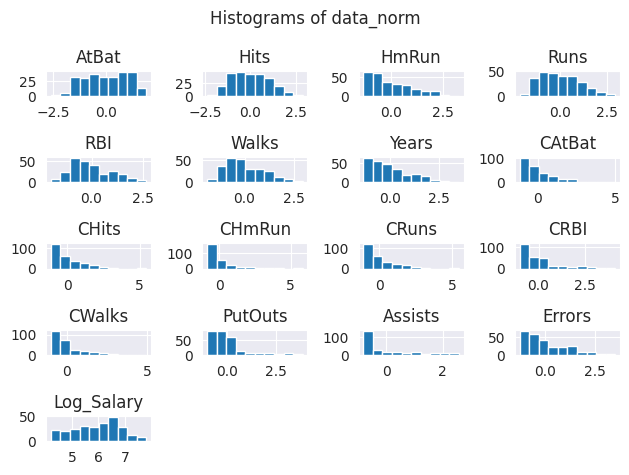

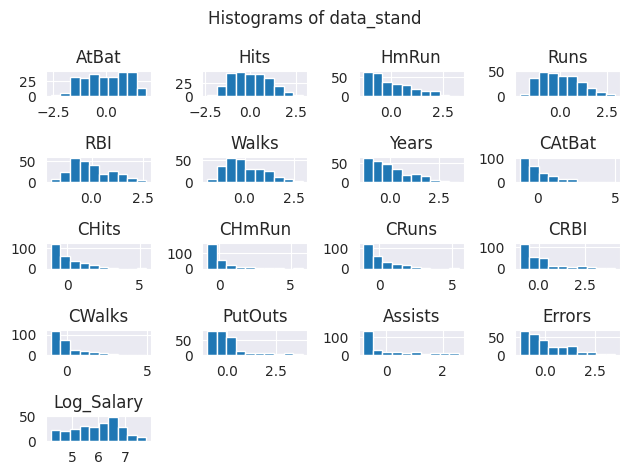

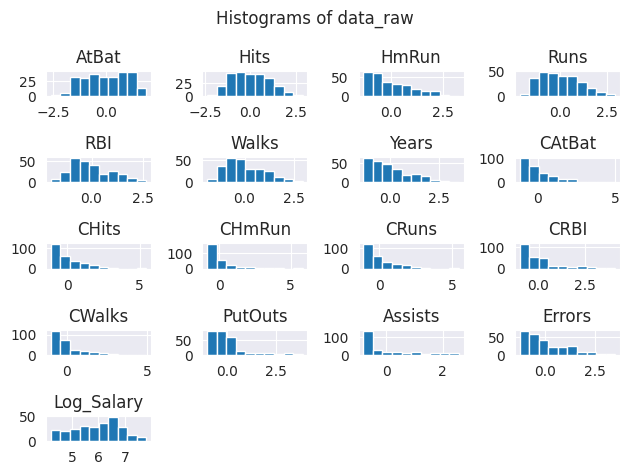

In [17]:
# Histograms
for data, name in data_objects:
    data_stand.hist()
    plt.suptitle(f"Histograms of {name}")
    plt.tight_layout()
    plt.show()

            AtBat  Hits    HmRun     Runs  RBI    Walks    Years  CAtBat  CHits   CHmRun  CRuns  \
AtBat         1.0   1.0  6.1e-01  9.3e-01  0.9  8.0e-01  1.6e-01    -0.7   -0.7 -1.9e-01   -0.5   
Hits          1.0   1.0  6.4e-01  9.4e-01  0.9  7.9e-01  1.2e-01    -0.6   -0.6 -1.7e-01   -0.4   
HmRun         0.6   0.6  1.0e+00  7.0e-01  0.9  5.3e-01  2.8e-02    -0.4   -0.4  4.4e-01   -0.2   
Runs          0.9   0.9  7.0e-01  1.0e+00  0.9  8.4e-01  6.9e-02    -0.6   -0.5 -6.4e-02   -0.3   
RBI           0.9   0.9  8.6e-01  8.6e-01  1.0  7.4e-01  1.1e-01    -0.6   -0.5  1.4e-01   -0.4   
Walks         0.8   0.8  5.3e-01  8.4e-01  0.7  1.0e+00  1.1e-01    -0.6   -0.6 -6.6e-02   -0.3   
Years         0.2   0.1  2.8e-02  6.9e-02  0.1  1.1e-01  1.0e+00    -0.1   -0.3 -1.4e-01   -0.3   
CAtBat       -0.7  -0.6 -3.8e-01 -5.7e-01 -0.6 -5.5e-01 -1.1e-01     1.0    0.9  2.4e-01    0.7   
CHits        -0.7  -0.6 -3.6e-01 -5.4e-01 -0.5 -5.6e-01 -2.8e-01     0.9    1.0  2.3e-01    0.8   
CHmRun    

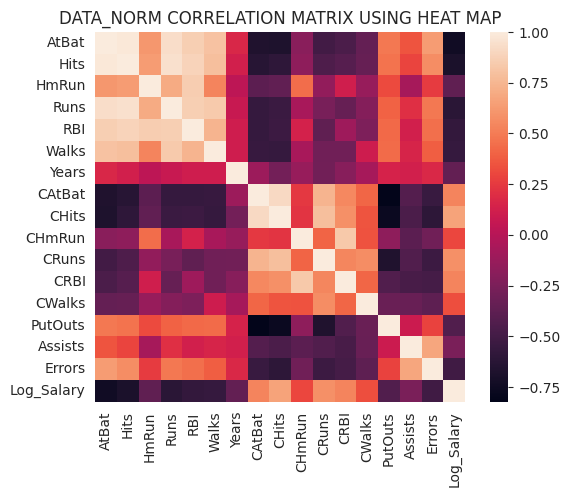

<Figure size 640x480 with 0 Axes>

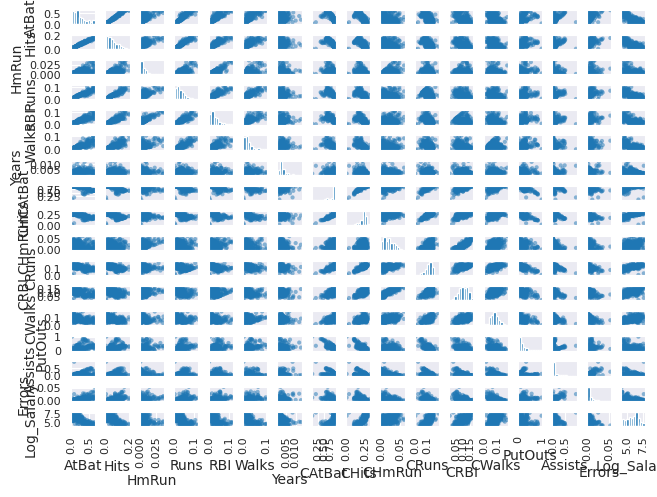

            AtBat  Hits    HmRun     Runs  RBI    Walks    Years  CAtBat  CHits   CHmRun  CRuns  \
AtBat         1.0   1.0  6.1e-01  9.3e-01  0.9  8.0e-01  1.6e-01    -0.7   -0.7 -1.9e-01   -0.5   
Hits          1.0   1.0  6.4e-01  9.4e-01  0.9  7.9e-01  1.2e-01    -0.6   -0.6 -1.7e-01   -0.4   
HmRun         0.6   0.6  1.0e+00  7.0e-01  0.9  5.3e-01  2.8e-02    -0.4   -0.4  4.4e-01   -0.2   
Runs          0.9   0.9  7.0e-01  1.0e+00  0.9  8.4e-01  6.9e-02    -0.6   -0.5 -6.4e-02   -0.3   
RBI           0.9   0.9  8.6e-01  8.6e-01  1.0  7.4e-01  1.1e-01    -0.6   -0.5  1.4e-01   -0.4   
Walks         0.8   0.8  5.3e-01  8.4e-01  0.7  1.0e+00  1.1e-01    -0.6   -0.6 -6.6e-02   -0.3   
Years         0.2   0.1  2.8e-02  6.9e-02  0.1  1.1e-01  1.0e+00    -0.1   -0.3 -1.4e-01   -0.3   
CAtBat       -0.7  -0.6 -3.8e-01 -5.7e-01 -0.6 -5.5e-01 -1.1e-01     1.0    0.9  2.4e-01    0.7   
CHits        -0.7  -0.6 -3.6e-01 -5.4e-01 -0.5 -5.6e-01 -2.8e-01     0.9    1.0  2.3e-01    0.8   
CHmRun    

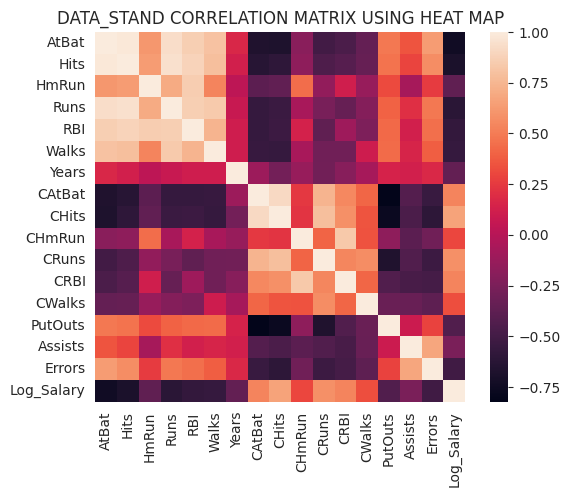

<Figure size 640x480 with 0 Axes>

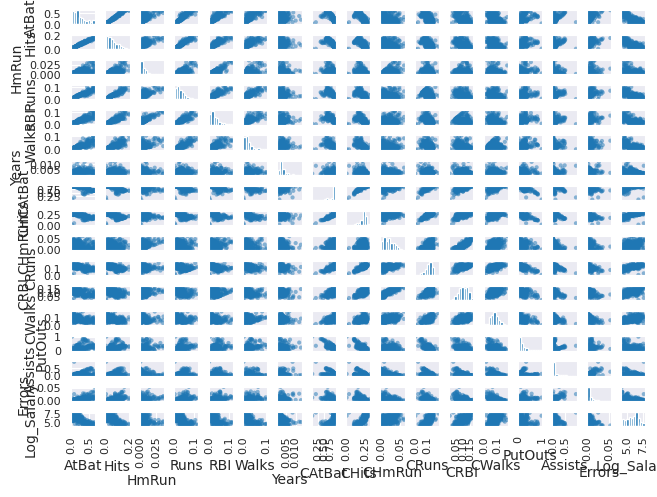

            AtBat  Hits    HmRun     Runs  RBI    Walks    Years  CAtBat  CHits   CHmRun  CRuns  \
AtBat         1.0   1.0  6.1e-01  9.3e-01  0.9  8.0e-01  1.6e-01    -0.7   -0.7 -1.9e-01   -0.5   
Hits          1.0   1.0  6.4e-01  9.4e-01  0.9  7.9e-01  1.2e-01    -0.6   -0.6 -1.7e-01   -0.4   
HmRun         0.6   0.6  1.0e+00  7.0e-01  0.9  5.3e-01  2.8e-02    -0.4   -0.4  4.4e-01   -0.2   
Runs          0.9   0.9  7.0e-01  1.0e+00  0.9  8.4e-01  6.9e-02    -0.6   -0.5 -6.4e-02   -0.3   
RBI           0.9   0.9  8.6e-01  8.6e-01  1.0  7.4e-01  1.1e-01    -0.6   -0.5  1.4e-01   -0.4   
Walks         0.8   0.8  5.3e-01  8.4e-01  0.7  1.0e+00  1.1e-01    -0.6   -0.6 -6.6e-02   -0.3   
Years         0.2   0.1  2.8e-02  6.9e-02  0.1  1.1e-01  1.0e+00    -0.1   -0.3 -1.4e-01   -0.3   
CAtBat       -0.7  -0.6 -3.8e-01 -5.7e-01 -0.6 -5.5e-01 -1.1e-01     1.0    0.9  2.4e-01    0.7   
CHits        -0.7  -0.6 -3.6e-01 -5.4e-01 -0.5 -5.6e-01 -2.8e-01     0.9    1.0  2.3e-01    0.8   
CHmRun    

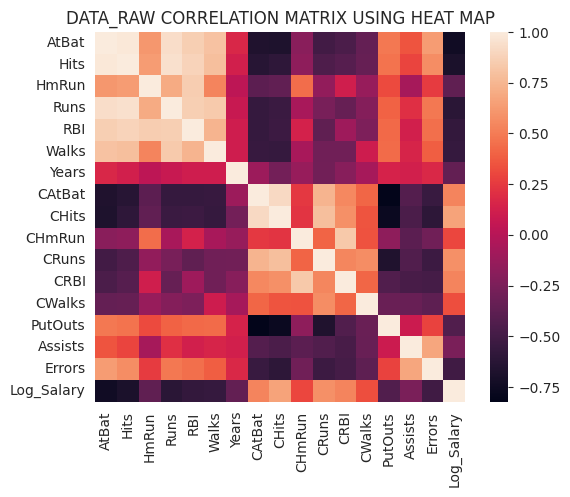

<Figure size 640x480 with 0 Axes>

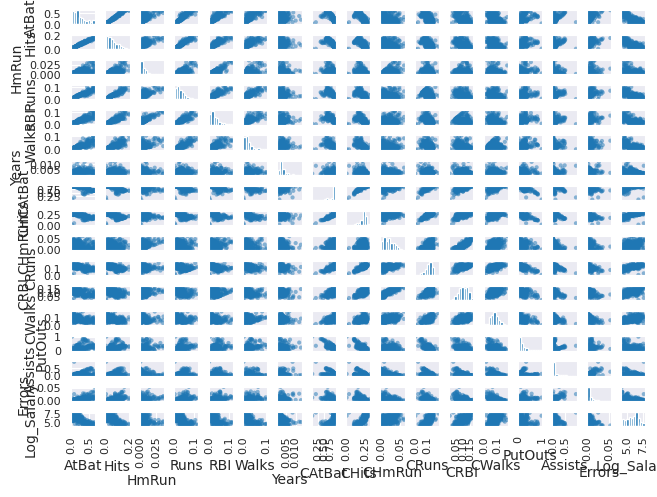

In [18]:
for data, name in data_objects:
    plt.figure() # new plot
    #plt.tight_layout()
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"{name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    scatter_matrix(data_norm)
    plt.tight_layout(pad=0.1)
    plt.show()

In [19]:
NUM_FEATURES = 16
model = LinearRegression()
rfe = RFE(model, n_features_to_select = NUM_FEATURES)
fit = rfe.fit(X1, Y1)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
score = rfe.score(X1,Y1)
print("Model Score with selected features is: ", score)

Num Features: 16
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Model Score with selected features is:  0.5426879134785905


3. For feature selection start with a large number of features and monitor the
performance measures. Pick the number of features based on the performance
measure when there is a significant change and stop when you do not see a major
improvement.

Raw Data
range(1, 17)
Num Features: 1
Selected Features: [False False False False False False  True False False False False False
 False False False False]
Feature Ranking: [ 6  3  5  7 12  4  1 16 14 15  8 13  9 11 10  2]
Num Features: 2
Selected Features: [False False False False False False  True False False False False False
 False False False  True]
Feature Ranking: [ 5  2  4  6 11  3  1 15 13 14  7 12  8 10  9  1]
Num Features: 3
Selected Features: [False  True False False False False  True False False False False False
 False False False  True]
Feature Ranking: [ 4  1  3  5 10  2  1 14 12 13  6 11  7  9  8  1]
Num Features: 4
Selected Features: [False  True False False False  True  True False False False False False
 False False False  True]
Feature Ranking: [ 3  1  2  4  9  1  1 13 11 12  5 10  6  8  7  1]
Num Features: 5
Selected Features: [False  True  True False False  True  True False False False False False
 False False False  True]
Feature Ranking: [ 2  1  1  3  8  1  1 1

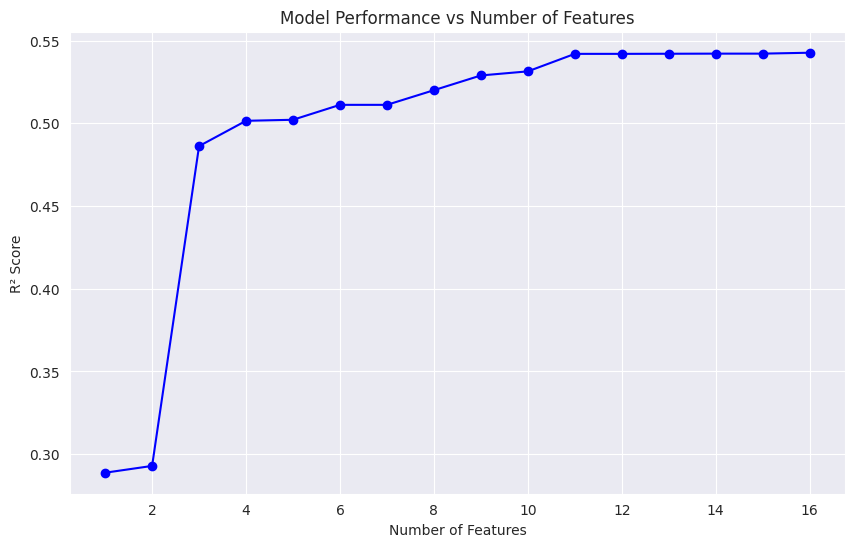

Optimal number of features: 16
Best score: 0.5427


In [20]:
def determine_optimal_number_of_features(X, Y):
    feature_counts = range(1, X.shape[1] + 1)
    scores = []
    print(feature_counts)
    for num_features in feature_counts:
        model = LinearRegression()
        rfe = RFE(model, n_features_to_select = num_features)
        fit = rfe.fit(X, Y)
        print("Num Features:", fit.n_features_)
        print("Selected Features:", fit.support_)
        print("Feature Ranking:", fit.ranking_)
        scores.append(rfe.score(X,Y))
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(feature_counts, scores, 'b-', marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('R² Score')
    plt.title('Model Performance vs Number of Features')
    plt.grid(True)
    plt.show()
    best_num_features = feature_counts[argmax(scores)]
    print(f"Optimal number of features: {best_num_features}")
    print(f"Best score: {max(scores):.4f}")
    return feature_counts, scores
print("Raw Data")
feature_counts, scores = determine_optimal_number_of_features(X1, Y1)

In [21]:
# Because 16 is the best, we will look for the lowest number of features with a similar score
def determine_features_within_threshold(_feature_counts, _scores):
    best_score = max(_scores)
    best_score_index = argmax(_scores)
    threshold = best_score * 0.99
    best_num_features = _feature_counts[best_score_index]
    i = best_score_index
    for i in range(best_score_index, 0, -1):
        if _scores[i] < threshold:
            print(f"Lowest number of features within 1% of best score: {_feature_counts[i]}")
            break
print("Raw Data")
determine_features_within_threshold(feature_counts, scores)

Raw Data
Lowest number of features within 1% of best score: 10


In [22]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
        """ Perform a forward-backward feature selection
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [23]:
result = stepwise_selection(X1, Y1)

Add  CRuns                          with p-value 1.88938e-29
Add  Hits                           with p-value 2.94819e-11
Add  Years                          with p-value 0.00578972


In [24]:
print(result)

['CRuns', 'Hits', 'Years']


2. Build a multiple linear regression model using the RFE and the stepwise methods. (Standardized Data)

Standard Data
range(1, 17)
Num Features: 1
Selected Features: [False False False False False False False False False False  True False
 False False False False]
Feature Ranking: [ 3  2 10 13 16  8  4  5  6 15  1 14  7  9 11 12]
Num Features: 2
Selected Features: [False  True False False False False False False False False  True False
 False False False False]
Feature Ranking: [ 2  1  9 12 15  7  3  4  5 14  1 13  6  8 10 11]
Num Features: 3
Selected Features: [ True  True False False False False False False False False  True False
 False False False False]
Feature Ranking: [ 1  1  8 11 14  6  2  3  4 13  1 12  5  7  9 10]
Num Features: 4
Selected Features: [ True  True False False False False  True False False False  True False
 False False False False]
Feature Ranking: [ 1  1  7 10 13  5  1  2  3 12  1 11  4  6  8  9]
Num Features: 5
Selected Features: [ True  True False False False False  True  True False False  True False
 False False False False]
Feature Ranking: [ 1  1  6  9 12  4

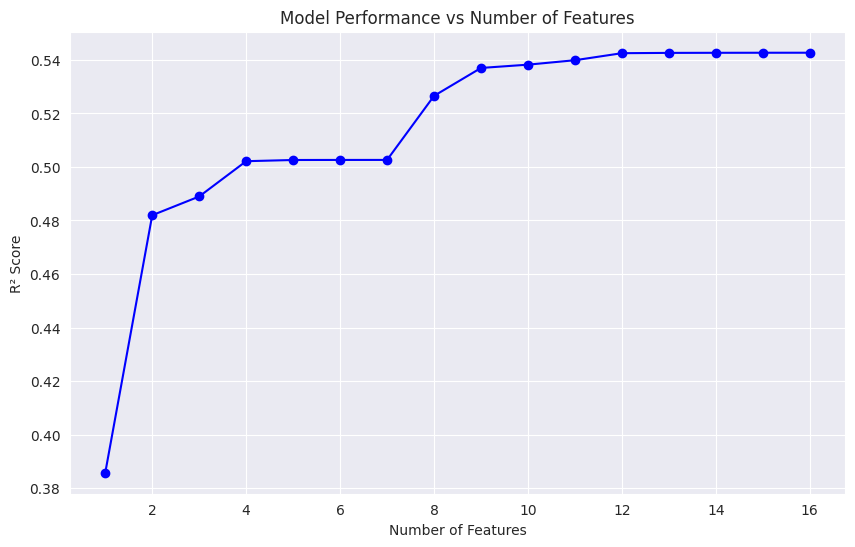

Optimal number of features: 16
Best score: 0.5427
Lowest number of features within 1% of best score: 9
Add  CRuns                          with p-value 1.88938e-29
Add  Hits                           with p-value 2.94819e-11
Add  Years                          with p-value 0.00578972
resulting features:
['CRuns', 'Hits', 'Years']


In [25]:
print("Standard Data")
stand_feature_counts, stand_scores = determine_optimal_number_of_features(X1_stand, Y1)
determine_features_within_threshold(stand_feature_counts, stand_scores)
result = stepwise_selection(X1_stand, Y1)
print('resulting features:')
print(result)

2. Build a multiple linear regression model using the RFE and the stepwise methods. (Normalized Data)


Normalized Data
range(1, 17)
Num Features: 1
Selected Features: [False False False False False False  True False False False False False
 False False False False]
Feature Ranking: [ 9  2 10  8  7 11  1  6  5 13  3  4 15 14 12 16]
Num Features: 2
Selected Features: [False  True False False False False  True False False False False False
 False False False False]
Feature Ranking: [ 8  1  9  7  6 10  1  5  4 12  2  3 14 13 11 15]
Num Features: 3
Selected Features: [False  True False False False False  True False False False  True False
 False False False False]
Feature Ranking: [ 7  1  8  6  5  9  1  4  3 11  1  2 13 12 10 14]
Num Features: 4
Selected Features: [False  True False False False False  True False False False  True  True
 False False False False]
Feature Ranking: [ 6  1  7  5  4  8  1  3  2 10  1  1 12 11  9 13]
Num Features: 5
Selected Features: [False  True False False False False  True False  True False  True  True
 False False False False]
Feature Ranking: [ 5  1  6  4  3 

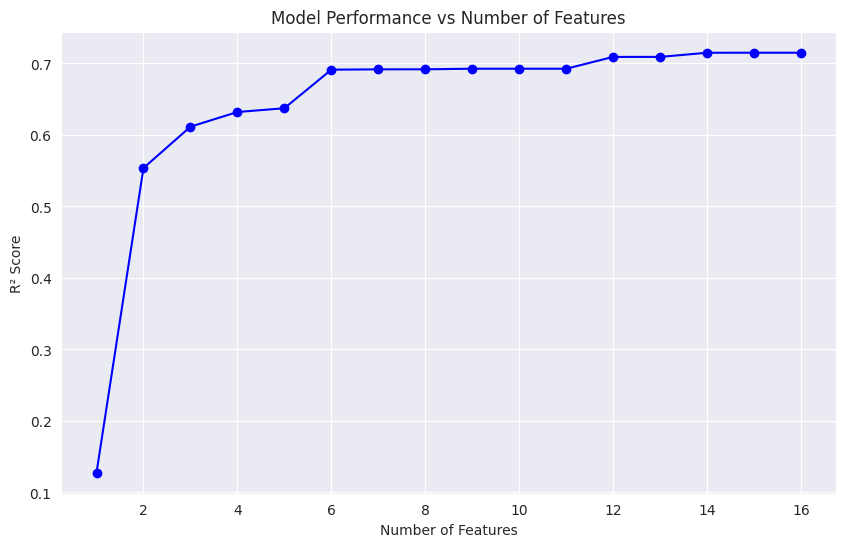

Optimal number of features: 16
Best score: 0.7149
Lowest number of features within 1% of best score: 11
Add  AtBat                          with p-value 2.04387e-46
Add  CRuns                          with p-value 1.68308e-09
Add  Years                          with p-value 1.1962e-06
Add  CRBI                           with p-value 0.00123202
Add  Assists                        with p-value 0.00102767
Add  PutOuts                        with p-value 0.00233182
Add  CHits                          with p-value 0.000270681
Add  CAtBat                         with p-value 9.77072e-05
resulting features:
['AtBat', 'CRuns', 'Years', 'CRBI', 'Assists', 'PutOuts', 'CHits', 'CAtBat']


In [26]:
print("Normalized Data")
norm_feature_counts, norm_scores = determine_optimal_number_of_features(X1_norm, Y1)
determine_features_within_threshold(norm_feature_counts, norm_scores)
result = stepwise_selection(X1_norm, Y1)
print('resulting features:')
print(result)

Normalization Impact:
- Substantially increases best score from 0.527 to 0.7149 (35%).
- Gives additional features which weren't significant in other methods. The top feature aligns with raw data.
- Appears to better represent the data by finding additional features leading to a better overall score.

Standardized Impact:
- Same top 3 features as raw, same best score.
- Chose feature 11 as highest (different from raw)